# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from api_keys import api_key
url = 'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=' + api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

#store data from API calls
weather_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [4]:
#Start api calls
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 1 # counter to count the number of call sets
index = 0
#Get current time
t0 =time.time()

print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        weather_df.set_value(index, "City", city_stats["name"])
        weather_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        weather_df.set_value(index, "Country", city_stats("sys.country"))
        weather_df.set_value(index, "Date", city_stats("dt"))
        weather_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        weather_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        weather_df.set_value(index, "Lat", city_stats("coord.lat"))
        weather_df.set_value(index, "Lng", city_stats("coord.lon"))
        weather_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 2 of Set 1 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?q=pangnirtung&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 3 of Set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
HTTP Error 404: Not Found
Processing Record 4 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?q=port%20alfred&units=imperial&APPID=3b8550477a4f07a338913f30590107e1


C:\Users\KUSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\KUSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\KUSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\KUSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\KUSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\User

Processing Record 5 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial%20do%20cabo&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 6 of Set 1 | sovetskiy
http://api.openweathermap.org/data/2.5/weather?q=sovetskiy&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 7 of Set 1 | upington
http://api.openweathermap.org/data/2.5/weather?q=upington&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 8 of Set 1 | port lincoln
http://api.openweathermap.org/data/2.5/weather?q=port%20lincoln&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 9 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 10 of Set 1 | ayaviri
http://api.openweathermap.org/data/2.5/weather?q=ayaviri&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 11 of Set 1 | vaini
http://api.openweatherm

Processing Record 9 of Set 2 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 10 of Set 2 | barentsburg
http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
HTTP Error 404: Not Found
Processing Record 11 of Set 2 | ngunguru
http://api.openweathermap.org/data/2.5/weather?q=ngunguru&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 12 of Set 2 | tukums
http://api.openweathermap.org/data/2.5/weather?q=tukums&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 13 of Set 2 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 14 of Set 2 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?q=kamenskoye&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
HTTP Error 404: Not Found
Processing Record 15 of Set

Processing Record 13 of Set 3 | yellowknife
http://api.openweathermap.org/data/2.5/weather?q=yellowknife&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 14 of Set 3 | acapulco
http://api.openweathermap.org/data/2.5/weather?q=acapulco&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 15 of Set 3 | samarinda
http://api.openweathermap.org/data/2.5/weather?q=samarinda&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 16 of Set 3 | waingapu
http://api.openweathermap.org/data/2.5/weather?q=waingapu&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 17 of Set 3 | cayenne
http://api.openweathermap.org/data/2.5/weather?q=cayenne&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 18 of Set 3 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 19 of Set 3 | victoria
http://api.openweathermap.org/d

Processing Record 18 of Set 4 | saskylakh
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 19 of Set 4 | beloha
http://api.openweathermap.org/data/2.5/weather?q=beloha&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 20 of Set 4 | lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 21 of Set 4 | carauari
http://api.openweathermap.org/data/2.5/weather?q=carauari&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 22 of Set 4 | vanimo
http://api.openweathermap.org/data/2.5/weather?q=vanimo&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 23 of Set 4 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?q=quatre%20cocos&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 24 of Set 4 | yerbogachen
http://api.openweathermap.org/data

Processing Record 22 of Set 5 | dubbo
http://api.openweathermap.org/data/2.5/weather?q=dubbo&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 23 of Set 5 | faya
http://api.openweathermap.org/data/2.5/weather?q=faya&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 24 of Set 5 | varhaug
http://api.openweathermap.org/data/2.5/weather?q=varhaug&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 25 of Set 5 | shebunino
http://api.openweathermap.org/data/2.5/weather?q=shebunino&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 26 of Set 5 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?q=nhulunbuy&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 27 of Set 5 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?q=bolungarvik&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
HTTP Error 404: Not Found
Processing Record 28 of Set 5 | yarada
http://api.openweatherm

Processing Record 25 of Set 6 | penapolis
http://api.openweathermap.org/data/2.5/weather?q=penapolis&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 26 of Set 6 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 27 of Set 6 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?q=beringovskiy&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 28 of Set 6 | gudermes
http://api.openweathermap.org/data/2.5/weather?q=gudermes&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 29 of Set 6 | pogaceaua
http://api.openweathermap.org/data/2.5/weather?q=pogaceaua&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 30 of Set 6 | newport
http://api.openweathermap.org/data/2.5/weather?q=newport&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 31 of Set 6 | bremervorde
http://api.openweathermap.or

Processing Record 28 of Set 7 | woodward
http://api.openweathermap.org/data/2.5/weather?q=woodward&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 29 of Set 7 | champerico
http://api.openweathermap.org/data/2.5/weather?q=champerico&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 30 of Set 7 | toliary
http://api.openweathermap.org/data/2.5/weather?q=toliary&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
HTTP Error 404: Not Found
Processing Record 31 of Set 7 | fujin
http://api.openweathermap.org/data/2.5/weather?q=fujin&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 32 of Set 7 | santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?q=santa%20isabel%20do%20rio%20negro&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 33 of Set 7 | sibolga
http://api.openweathermap.org/data/2.5/weather?q=sibolga&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 34

Processing Record 30 of Set 8 | chancay
http://api.openweathermap.org/data/2.5/weather?q=chancay&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 31 of Set 8 | westpunt
http://api.openweathermap.org/data/2.5/weather?q=westpunt&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
HTTP Error 404: Not Found
Processing Record 32 of Set 8 | barra
http://api.openweathermap.org/data/2.5/weather?q=barra&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 33 of Set 8 | pelym
http://api.openweathermap.org/data/2.5/weather?q=pelym&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 34 of Set 8 | hilton head island
http://api.openweathermap.org/data/2.5/weather?q=hilton%20head%20island&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 35 of Set 8 | manisa
http://api.openweathermap.org/data/2.5/weather?q=manisa&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 36 of Set 8 | baykit
http://api.

Processing Record 34 of Set 9 | weligama
http://api.openweathermap.org/data/2.5/weather?q=weligama&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 35 of Set 9 | treinta y tres
http://api.openweathermap.org/data/2.5/weather?q=treinta%20y%20tres&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 36 of Set 9 | bacolod
http://api.openweathermap.org/data/2.5/weather?q=bacolod&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 37 of Set 9 | mitsamiouli
http://api.openweathermap.org/data/2.5/weather?q=mitsamiouli&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 38 of Set 9 | freeport
http://api.openweathermap.org/data/2.5/weather?q=freeport&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 39 of Set 9 | haverfordwest
http://api.openweathermap.org/data/2.5/weather?q=haverfordwest&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 40 of Set 9 | aykhal
http://api.op

Processing Record 37 of Set 10 | opuwo
http://api.openweathermap.org/data/2.5/weather?q=opuwo&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 38 of Set 10 | half moon bay
http://api.openweathermap.org/data/2.5/weather?q=half%20moon%20bay&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 39 of Set 10 | diffa
http://api.openweathermap.org/data/2.5/weather?q=diffa&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 40 of Set 10 | katsuura
http://api.openweathermap.org/data/2.5/weather?q=katsuura&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 41 of Set 10 | ashtian
http://api.openweathermap.org/data/2.5/weather?q=ashtian&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 42 of Set 10 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?q=dicabisagan&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 43 of Set 10 | evensk
http://api.openweathermap.org/

Processing Record 40 of Set 11 | broken hill
http://api.openweathermap.org/data/2.5/weather?q=broken%20hill&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 41 of Set 11 | mwanza
http://api.openweathermap.org/data/2.5/weather?q=mwanza&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 42 of Set 11 | esik
http://api.openweathermap.org/data/2.5/weather?q=esik&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 43 of Set 11 | san isidro
http://api.openweathermap.org/data/2.5/weather?q=san%20isidro&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 44 of Set 11 | udachnyy
http://api.openweathermap.org/data/2.5/weather?q=udachnyy&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 45 of Set 11 | dudinka
http://api.openweathermap.org/data/2.5/weather?q=dudinka&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 46 of Set 11 | oriximina
http://api.openweathermap.org/dat

Processing Record 43 of Set 12 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 44 of Set 12 | turka
http://api.openweathermap.org/data/2.5/weather?q=turka&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 45 of Set 12 | zhigansk
http://api.openweathermap.org/data/2.5/weather?q=zhigansk&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 46 of Set 12 | khasan
http://api.openweathermap.org/data/2.5/weather?q=khasan&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 47 of Set 12 | alta
http://api.openweathermap.org/data/2.5/weather?q=alta&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 48 of Set 12 | shu
http://api.openweathermap.org/data/2.5/weather?q=shu&units=imperial&APPID=3b8550477a4f07a338913f30590107e1
Processing Record 49 of Set 12 | dourados
http://api.openweathermap.org/data/2.5/weather?q=d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df.count()

City          548
Cloudiness    548
Country       548
Date          548
Max Temp      548
Wind Speed    548
Lat           548
Lng           548
Humidity      548
dtype: int64

In [8]:
weather_df.to_csv("weather_df.csv")
weather_df.head(5)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Bluff,0,AU,1562859576,57.65,3.76,-23.58,149.07,49
1,Pangnirtung,75,CA,1562859661,57.2,9.17,66.15,-65.72,67
2,Port Alfred,0,ZA,1562859616,69.01,3,-33.59,26.89,54
3,Arraial do Cabo,0,BR,1562859422,77,5.82,-22.97,-42.02,47
4,Sovetskiy,79,RU,1562860055,62.15,4.43,56.76,48.47,82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

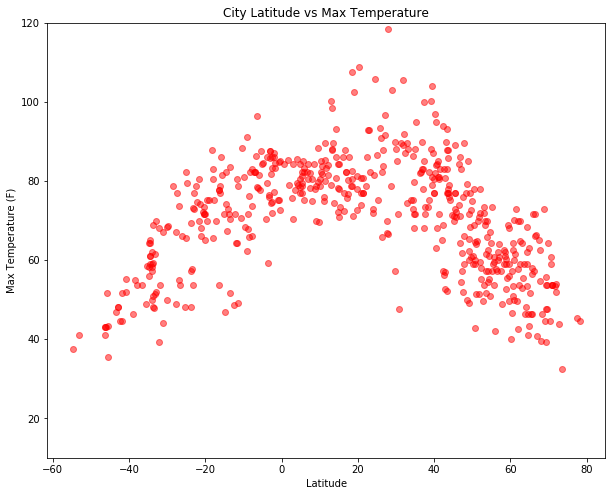

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim(10,120)
plt.title(f'City Latitude vs Max Temperature')
plt.savefig("Lat Vs Temp.png")

#### Latitude vs. Humidity Plot

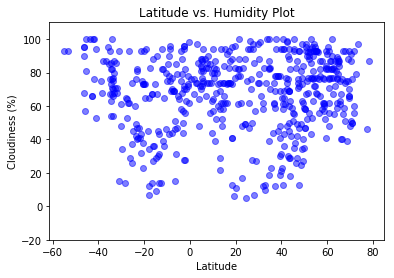

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color="b", alpha = .5)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-20,110)
plt.savefig("Latitude vs. Humidity Plot.png")

#### Latitude vs. Cloudiness Plot

(-20, 120)

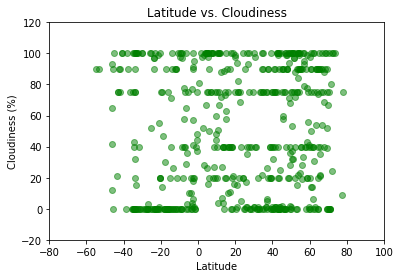

In [31]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],color="g", alpha=.5)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,100)
plt.ylim(-20,120)

#### Latitude vs. Wind Speed Plot

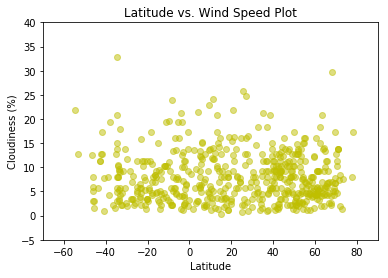

In [48]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], color="y", alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-70,90)
plt.ylim(-5,40)
plt.title("Latitude vs. Wind Speed Plot")
plt.savefig("Latitude vs. Wind Speed Plot.png")